In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from plotting_tempelate import plot_bench_bars
import ast

ImportError: attempted relative import with no known parent package

In [ ]:
# Load data files into a big dictioanry
raw_data = {}
# methods = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        name = '_'.join((file.split('.')[0]).split('_')[2:])
        # print(name)
        raw_data[name] = pd.read_csv(os.path.join(file))
        # methods.append(name)

# methods.sort(reverse=True)
# print(methods)
methods = ['ECMP_ASP', 'ECMP_APST4', 'OPT', 'MP_ASP', 'MP_APST4', 'IT_1+6', 'IT_2+6', 'IT_3+6', 'IT_4+6']

In [ ]:
# the key of each file:
# OPT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_OPT,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# MP: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_MP_ASP,Phi_NEXU[Gbps],init_time[s],solving_time[s],peak_RAM[MB]

# IT: V,D,traffic_pattern,Lremote_MAX_ECMP_ASP,Llocal_MAX_ECMP_ASP,Phi_ECMP_ASP[Gbps],
        #Lremote_NEXU_IT,Phi_NEXU[Gbps],method1_times[s],method1_peak_RAMs[MB],method1_results[Gbps],method2_time[s],method2_attempts,method2_peak_RAM[MB]


In [ ]:
# calculate time for each method:

raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] # did not count the init time
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] # did not count the init time
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] # did not count the init time
raw_data['IT_1+6']['_time'] = raw_data['IT_1+6']['method2_time[s]'] + raw_data['IT_1+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_2+6']['_time'] = raw_data['IT_2+6']['method2_time[s]'] + raw_data['IT_2+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_3+6']['_time'] = raw_data['IT_3+6']['method2_time[s]'] + raw_data['IT_3+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_4+6']['_time'] = raw_data['IT_4+6']['method2_time[s]'] + raw_data['IT_4+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

In [ ]:
def plot_for_V_D(V:int, D:int):
    plot_data = {
        'uniform': [],
        'shift_1': [],
        'shift_quater': [],
        'shift_half': [],
        'diagonal_1': [],
        'diagonal_quater': []
    }
    y_counter = {}.fromkeys(methods, 0) # for each method, add up the y values
    for traffic_pattern, _data in plot_data.items():
        for method_name in methods:
            if method_name == "ECMP_ASP":
                _value = 0
                plot_data[traffic_pattern].append(_value)
            elif method_name == "ECMP_APST4":
                _value = 0
                plot_data[traffic_pattern].append(_value)
            elif method_name == "OPT":
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["_time"].values
                if len(_value):
                    _value = _value[0]
                else:
                    _value = 0
                plot_data[traffic_pattern].append(_value)
            else:
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["_time"].values[0]
                plot_data[traffic_pattern].append(_value)
            
            y_counter[method_name] += _value
    plot_data['average'] = np.array(list(y_counter.values()))/len(list(y_counter.values()))
    plot_bench_bars(plot_data, methods, f"RRG({V},{D})", "traffic demand patterns", "Execution time[s]", y_log=True)

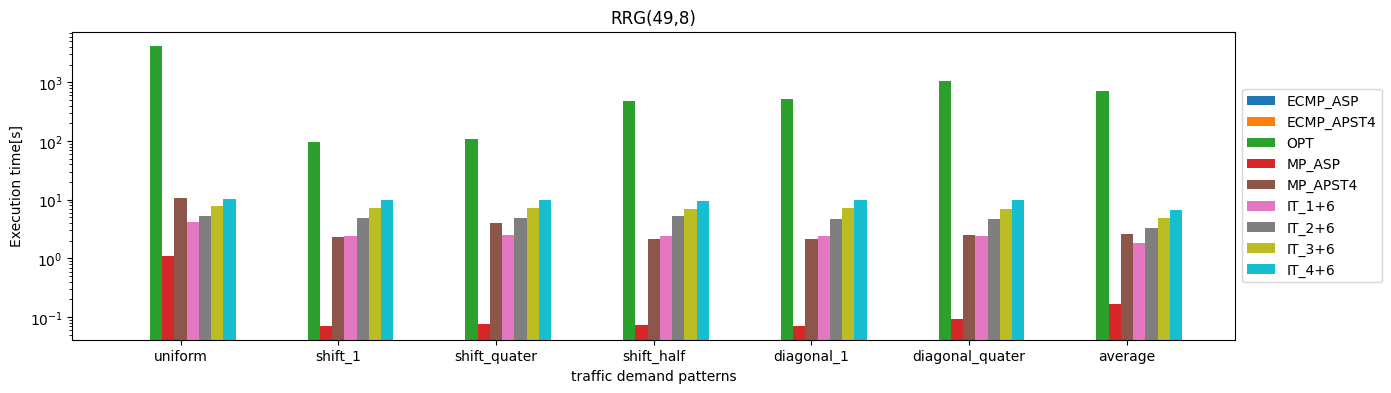

In [ ]:
plot_for_V_D(49,8)

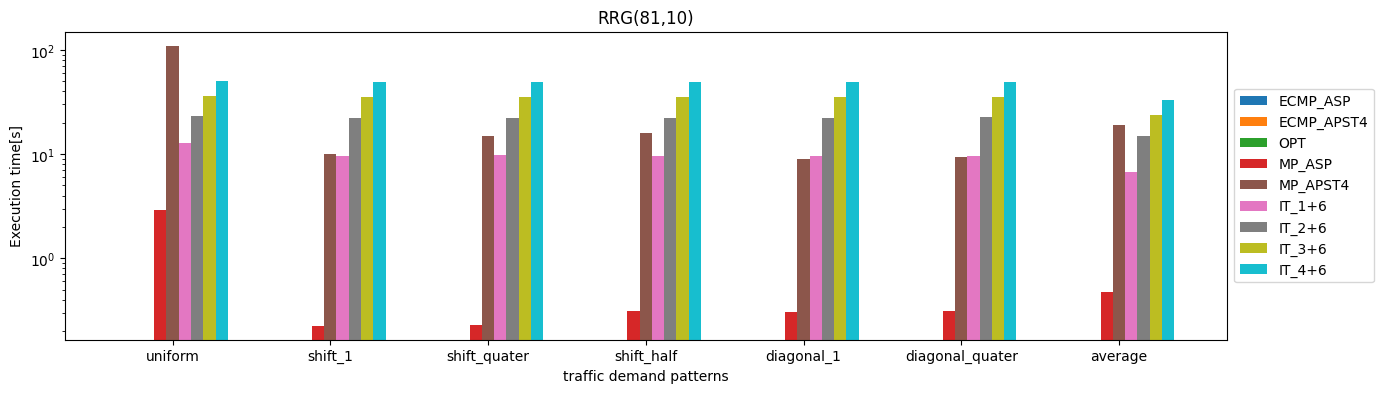

In [ ]:
plot_for_V_D(81,10)

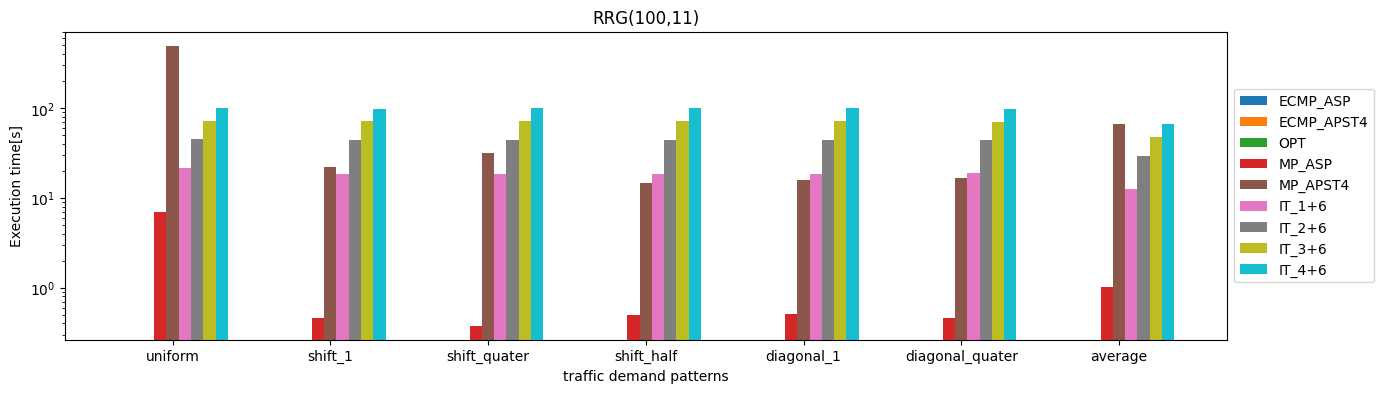

In [ ]:
plot_for_V_D(100,11)

In [ ]:
# calculate time for each method:

raw_data['OPT']['_time'] = raw_data['OPT']['solving_time[s]'] + raw_data['OPT']['init_time[s]']
raw_data['MP_ASP']['_time'] = raw_data['MP_ASP']['solving_time[s]'] + raw_data['MP_ASP']['init_time[s]']
raw_data['MP_APST4']['_time'] = raw_data['MP_APST4']['solving_time[s]'] + raw_data['MP_APST4']['init_time[s]']
raw_data['IT_1+6']['_time'] = raw_data['IT_1+6']['method2_time[s]'] + raw_data['IT_1+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_2+6']['_time'] = raw_data['IT_2+6']['method2_time[s]'] + raw_data['IT_2+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_3+6']['_time'] = raw_data['IT_3+6']['method2_time[s]'] + raw_data['IT_3+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))
raw_data['IT_4+6']['_time'] = raw_data['IT_4+6']['method2_time[s]'] + raw_data['IT_4+6']['method1_times[s]'].apply(lambda x: sum(ast.literal_eval(x)))

In [ ]:
def plot_for_V_D(V:int, D:int):
    plot_data = {
        'uniform': [],
        'shift_1': [],
        'shift_quater': [],
        'shift_half': [],
        'diagonal_1': [],
        'diagonal_quater': []
    }
    y_counter = {}.fromkeys(methods, 0) # for each method, add up the y values
    for traffic_pattern, _data in plot_data.items():
        for method_name in methods:
            if method_name == "ECMP_ASP":
                _value = 0
                plot_data[traffic_pattern].append(_value)
            elif method_name == "ECMP_APST4":
                _value = 0
                plot_data[traffic_pattern].append(_value)
            elif method_name == "OPT":
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["_time"].values
                if len(_value):
                    _value = _value[0]
                else:
                    _value = 0
                plot_data[traffic_pattern].append(_value)
            else:
                _value = raw_data[method_name][(raw_data[method_name]["V"]==V) & (raw_data[method_name]["traffic_pattern"]==traffic_pattern)]["_time"].values[0]
                plot_data[traffic_pattern].append(_value)
            
            y_counter[method_name] += _value
    plot_data['average'] = np.array(list(y_counter.values()))/len(list(y_counter.values()))
    plot_bench_bars(plot_data, methods, f"RRG({V},{D})", "traffic demand patterns", "Execution time[s]", y_log=True)

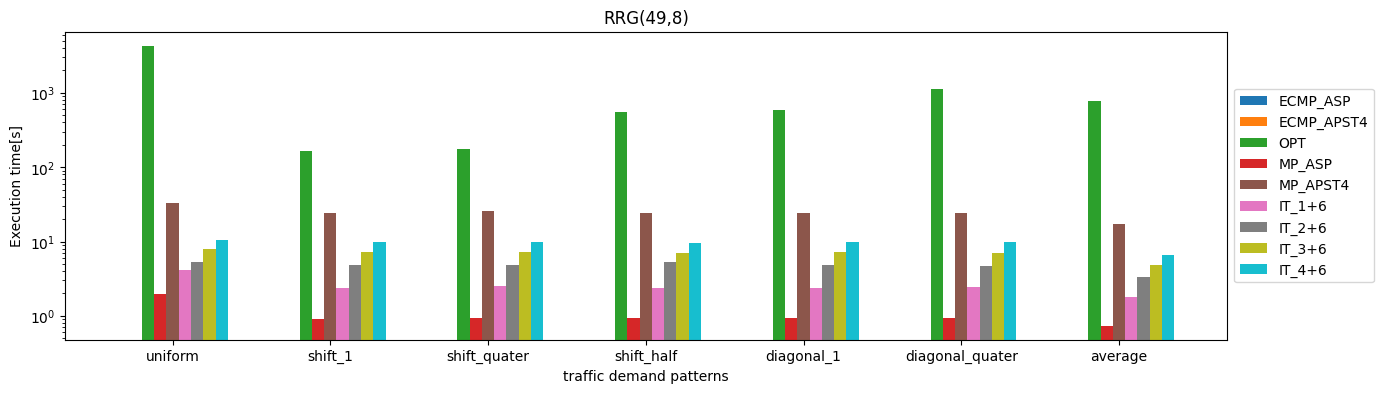

In [ ]:
plot_for_V_D(49,8)

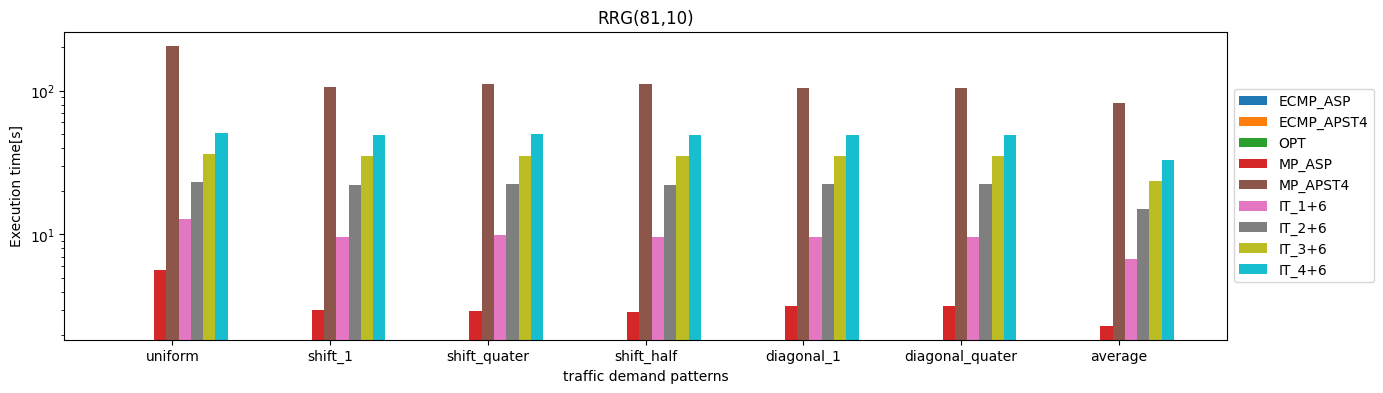

In [ ]:
plot_for_V_D(81,10)

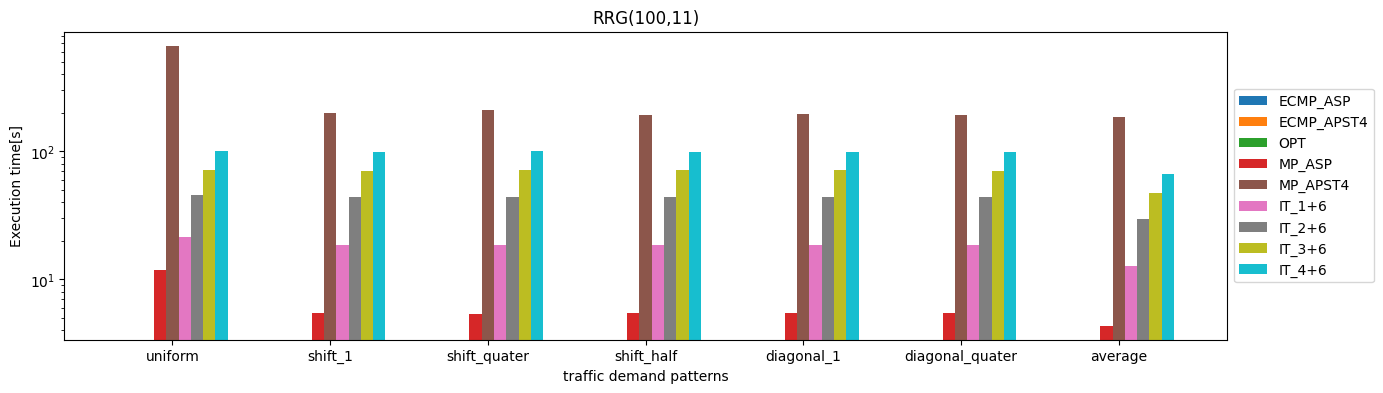

In [ ]:
plot_for_V_D(100,11)